In [80]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix

# ";"을 기준으로 컬럼을 구분하여 csv파일을 읽고 변수에 저장
red_df = pd.read_csv("./winequality-red.csv", sep=";")
white_df = pd.read_csv("./winequality-white.csv", sep=";")
# 타입을 레드 기준으로 정렬, 첫번째 인수 0은 인덱스, 삽입할 새 열의 이름, 새 열에 삽입할 값
red_df.insert(0, column='type', value='red')
# 결과적으로 red 와인이라는 것을 라벨링하기 위한 작업
# white_df.insert(0, column='type', value='white')
# ignore_index=True으로 인덱스를 무시하고,
wine = pd.concat([red_df, white_df], ignore_index=True)

# wine['type'] = wine['type'].replace('red','1')
# wine['type'] = wine['type'].replace('white','0')
# type' 열에 있는 값을 대체합니다. 첫 번째 줄은 'type' 열에 있는 'red'의 모든 인스턴스를 값 '1'로 바꾸고
# 두 번째 줄은 'type' 열에 있는 'white'의 모든 인스턴스를 값 '0'으로 바꿉니다. 이는 일반적으로 범주형 데이터를 수치 데이터로 변환하기 위해 수행

# 와인의 대한 분류는 굳이 필요 없으므로 삭제 red, white 하나의 데이터 프레임으로 만듬
x_data = wine.iloc[:, 1:]

y_data = wine.iloc[:, -1]  # 퀄리티에 대한 값만 저장

# print(x_data)

# wine quality 값이 5보다 작으면 0,  5보다 크거나 같으면 1로 값 변경.

y_data = np.array([1 if i >= 5 else 0 for i in y_data])


x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2)  # 80:20 비율로 나눔

model = LogisticRegression(max_iter=50000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print(y_pred)


46 0 0 1254
[1 1 1 ... 1 1 1]


In [81]:
Precision = tp/(tp + fp)
Recall = tp/(tp + fn)
Accuracy = (tp + tn) / (tp+tn+fn+fp)
f1 = 2*(Precision*Recall) / (Precision + Recall)
print(Precision, Recall, f1, Accuracy)


1.0 1.0 1.0 1.0


In [83]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


kfold = StratifiedKFold(n_splits=5)

X = x_data.values
y = y_data

avg_accuracy_score = []

for train, test in kfold.split(X, y):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]

    model = LogisticRegression(max_iter=5000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    avg_accuracy_score.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
print(sum(avg_accuracy_score) / len(avg_accuracy_score))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00      1250

    accuracy                           1.00      1299
   macro avg       1.00      1.00      1.00      1299
weighted avg       1.00      1.00      1.00      1299

1.0
1.0
1.0
1.0
1.0
1.0


실습과제2


In [88]:
import pandas as pd
import numpy as np  # 대규모 다차원 배열과 행렬을 지원
# skikit-lean은 분유,뢰귀,클러스팅 등을 위한 다양한 도구
from sklearn.tree import DecisionTreeClassifier
# 테스트 집합으로 분할하는 등 모델 선택을 위한 다양한 함수 제공
from sklearn.model_selection import train_test_split
from sklearn import metrics  # sklearn 머신 러닝 모델의 성능을 평가하기 위한 다양한 메트릭이 있음


In [90]:
df = pd.read_csv("./winequality-red.csv", sep=";")
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [91]:
X = np.array(pd.DataFrame(df, columns=["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
                                       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]))
y = np.array(pd.DataFrame(df, columns=["quality"]))


In [92]:
print(X)
print(y)


[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[[5]
 [5]
 [5]
 ...
 [6]
 [5]
 [6]]


In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)  # 트레인과 테스트를 8:2로 나눔


In [95]:
print(X_test)


[[ 7.8    0.55   0.35  ...  3.25   0.56   9.2  ]
 [ 9.4    0.34   0.37  ...  3.22   0.62   9.2  ]
 [ 7.2    0.37   0.32  ...  3.23   0.73  11.3  ]
 ...
 [ 6.4    0.79   0.04  ...  3.53   0.65  10.4  ]
 [ 7.8    0.56   0.12  ...  3.37   0.5    9.4  ]
 [ 8.1    0.575  0.22  ...  3.29   0.51   9.2  ]]


In [97]:
# 'LabelEncoder'는 범주형 또는 숫자가 아닌 변수를 숫자 값으로 인코딩하는 데 도움이 되는 scikit-learn(sklearn)의 유틸리티 클래스
from sklearn.preprocessing import LabelEncoder
# 모델이 처리할 수 있도록 숫자 형식으로 변환해야 하는 숫자가 아닌 기능이 데이터에 포함된 경우 기계 학습 작업에서 일반적으로 사용
LE = LabelEncoder()  # LE = LabelEncoder(): 이 줄은 LabelEncoder 클래스의 인스턴스를 생성하고 변수 LE에 할당합니다. 이제 LabelEncoder 개체를 사용하여 레이블 인코딩을 수행


In [98]:
for feature in df.columns:  # 열을 돌면서
    df[feature] = LE.fit_transform(df[feature])  # 현재 기능의 값에 레이블 인코딩을 적용,
    # 'fit_transform()' 메서드는 데이터에서 고유한 범주를 학습하고 값을 해당 숫자 레이블로 변환 그 값을 다시 열에 적용


In [101]:
print(df)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0                27                76            0              10         39   
1                31               112            0              22         61   
2                31                88            4              17         55   
3                65                12           56              10         38   
4                27                76            0              10         39   
...             ...               ...          ...             ...        ...   
1594             15                56            8              11         53   
1595             12                47           10              15         25   
1596             16                42           13              17         39   
1597             12                65           12              11         38   
1598             13                17           47              36         30   

      free sulfur dioxide  

In [ ]:
X = np.array(pd.DataFrame(df, columns=["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
                                       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]))  # df에서 특정 열을 선택 행렬 x를 만듬
# 선택된 열만 pd.DataFrame으로 새 데이터 프레임을 생성, np.array()로 데이터 프레임을 NumPy 배열로 변환
y = np.array(pd.DataFrame(df, columns=["quality"]))
# 학습과 테스트 집합으로 분할 scikit-learn의 train_test_split()함수 사용 70% 학습, 30% 테스트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [102]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy', 
                                             max_features=3, min_samples_leaf=2)
#이 라인은 scikit-learn에서 DecisionTreeClassifier 클래스의 인스턴스를 생성, 'DecisionTreeClassifier'는 분류 작업에 사용되는 널리 사용되는 알고리즘
#criterion='entropy': 의사결정 트리의 노드를 분할하는 데 사용되는 기준을 지정, 
#엔트로피는 불순물의 척도이며 엔트로피를 기준으로 사용하는 것은 트리 구축 과정에서 정보 획득을 최대화하는 것을 목표
#max_features=3: 최상의 분할을 찾을 때 고려할 최대 기능 수를 지정, 이 경우 각 분할에서 세 가지 기능만 고려
#min_samples_leaf=2: 리프 노드에 있어야 하는 최소 샘플 수를 지정, 이 값보다 샘플 수가 적은 노드는 더 이상 분할되지 않음,
#트리의 복잡성을 제어하고 과적합을 방지하는 데 도움

decision_tree_model.fit(X_train, y_train)
#결정 트리 분류기 모델을 훈련 데이터에 맞춤
#fit() 메서드는 decision_tree_model 객체에서 호출되며 X_train은 기능 행렬이고 y_train은 대상 배열

y_pred = decision_tree_model.predict(X_test)
#y_pred = decision_tree_model.predict(X_test): 이 라인은 훈련된 의사 결정 트리 모델을 사용하여 테스트 데이터를 예측, predict() 메서드는 X_test를 특징 행렬로 사용하여 decision_tree_model 개체에서 호출
#이 모델은 교육 데이터의 학습된 패턴을 사용하여 테스트 데이터에 해당하는 레이블을 예측, 예측된 레이블은 y_pred 변수에 저장

In [103]:
print (y_pred)

[5 6 7 5 5 5 6 4 6 6 5 6 5 5 6 6 6 6 5 5 6 5 6 6 5 5 5 5 6 5 8 6 6 6 5 5 7
 5 5 6 5 5 6 4 5 5 5 6 5 5 5 6 6 5 6 7 4 6 4 5 5 5 6 7 6 5 4 6 6 7 5 6 5 6
 5 5 5 6 6 5 7 6 5 6 5 5 5 5 6 6 6 6 5 7 5 7 7 5 5 7 5 5 7 6 6 6 5 7 5 6 8
 6 5 5 5 6 4 5 6 5 7 5 5 5 7 7 6 6 4 6 4 7 5 6 5 6 6 5 6 5 6 5 6 7 5 6 6 6
 6 6 5 6 6 5 6 6 6 6 6 5 7 5 5 6 5 6 5 4 6 5 6 5 6 5 6 5 5 5 6 5 5 6 5 5 6
 5 6 6 6 6 6 5 5 5 5 6 5 5 5 5 5 6 6 6 6 6 5 5 5 7 6 5 6 6 4 6 5 5 5 6 5 6
 5 5 5 4 5 5 5 5 6 5 6 6 5 5 6 7 5 6 6 5 5 6 7 5 5 6 5 5 6 5 6 6 5 5 5 6 7
 6 7 6 5 5 5 5 6 5 6 7 5 6 6 5 6 6 5 6 5 7 6 5 7 5 6 6 4 7 5 6 5 7 6 6 6 5
 5 6 6 5 6 6 5 7 5 6 5 6 5 6 7 5 5 6 4 6 5 5 6 5]


In [104]:
print (y_test)

[[5]
 [5]
 [7]
 [5]
 [6]
 [5]
 [6]
 [4]
 [6]
 [6]
 [5]
 [6]
 [6]
 [7]
 [6]
 [6]
 [6]
 [6]
 [4]
 [5]
 [6]
 [5]
 [6]
 [6]
 [5]
 [8]
 [5]
 [5]
 [6]
 [6]
 [6]
 [7]
 [5]
 [5]
 [6]
 [5]
 [7]
 [5]
 [6]
 [6]
 [5]
 [5]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [5]
 [6]
 [7]
 [5]
 [5]
 [7]
 [4]
 [6]
 [5]
 [6]
 [6]
 [6]
 [5]
 [5]
 [4]
 [7]
 [4]
 [5]
 [5]
 [8]
 [5]
 [5]
 [5]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [5]
 [7]
 [7]
 [5]
 [6]
 [6]
 [5]
 [6]
 [5]
 [6]
 [6]
 [6]
 [6]
 [5]
 [7]
 [5]
 [6]
 [7]
 [5]
 [5]
 [7]
 [5]
 [5]
 [5]
 [6]
 [6]
 [5]
 [5]
 [6]
 [5]
 [6]
 [7]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [4]
 [6]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [5]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [5]
 [6]
 [5]
 [6]
 [6]
 [5]
 [7]
 [5]
 [6]
 [5]
 [5]
 [6]
 [6]
 [5]
 [6]
 [6]
 [5]
 [6]
 [6]
 [6]
 [5]
 [7]
 [5]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [5]
 [5]
 [6]
 [5]
 [6]
 [5]
 [6]
 [5]
 [5]
 [5]
 [5]
 [6]
 [6]
 [5]
 [5]
 [6]
 [6]
 [7]
 [6]
 [5]
 [6]
 [6]
 [6]
 [6]
 [6]
 [5]
 [5]
 [6]
 [6]
 [3]
 [6]
 [7]
 [5]
 [5]


In [105]:
from sklearn.metrics import accuracy_score
# scikit-learn의 `metrics` 모듈에서 `accuracy_score` 함수를 가져옴,
# 정확도_점수` 함수는 실제 레이블과 비교하여 예측된 레이블의 정확도를 계산하는 데 사용

from sklearn.metrics import confusion_matrix
# scikit-learn의 `metrics` 모듈에서 `confusion_matrix` 함수를 가져옴,
# confusion_matrix` 함수는 분류 모델의 성능을 설명하는 테이블인 혼동 행렬을 계산하는 데 사용

print(accuracy_score(y_pred, y_test))
# `print(accuracy_score(y_pred, y_test))`: 이 줄은 모델 예측의 정확도 점수를 계산하여 출력
# 정확도_스코어` 함수는 `y_pred`를 예측 레이블로, `y_test`를 실제 레이블로 사용하여 호출
# 이 함수는 예측된 레이블과 실제 레이블을 비교하여 올바르게 분류된 샘플의 비율인 정확도를 반환

print(confusion_matrix(y_test, y_pred))
# `print(confusion_matrix(y_test, y_pred))`: 이 줄은 모델 예측의 혼동 행렬을 계산하여 출력,
# 이 함수는 `y_test`를 실제 레이블로, `y_pred`를 예측 레이블로 사용하여 `confusion_matrix` 함수를 호출
# 혼동 행렬은 정탐, 정탐, 오탐 및 미탐 예측의 수를 표시하여 모델의 성능을 요약


0.621875
[[ 0  0  0  2  0  0]
 [ 0  3  4  1  0  0]
 [ 0  4 96 26  5  0]
 [ 0  5 37 88 11  1]
 [ 0  1  8 11 12  1]
 [ 0  0  1  1  2  0]]


In [124]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

wine_data = pd.read_csv('./winequality-red.csv',delimiter=';',dtype=float)

wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5.0


In [175]:
x_data = wine_data.iloc[:,0:-1]

y_data = wine_data.iloc[:,-1]

print(x_data)
# Score 값이 7보다 작으면 0,  7보다 크거나 같으면 1로 값 변경.

y_data = np.array(["low" if score < 3 else "average" if score < 7 else "high" for score in y_data])


# 트레인, 테스트 데이터 나누기.

train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size = 0.3,random_state=42)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [159]:
from sklearn import tree
wine_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth=5,splitter='random')

wine_tree.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=5, splitter='random')

In [160]:
y_pred_train = wine_tree.predict(train_x)

y_pred_test = wine_tree.predict(test_x)



print("Train Data:", accuracy_score(train_y, y_pred_train))

print("Test Data" , accuracy_score(test_y, y_pred_test))

Train Data: 0.902591599642538
Test Data 0.8604166666666667


In [161]:
from sklearn.metrics import classification_report

y_true, y_pred = test_y, wine_tree.predict(test_x)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

     average       0.90      0.94      0.92       413
        high       0.50      0.39      0.44        67

    accuracy                           0.86       480
   macro avg       0.70      0.66      0.68       480
weighted avg       0.85      0.86      0.85       480



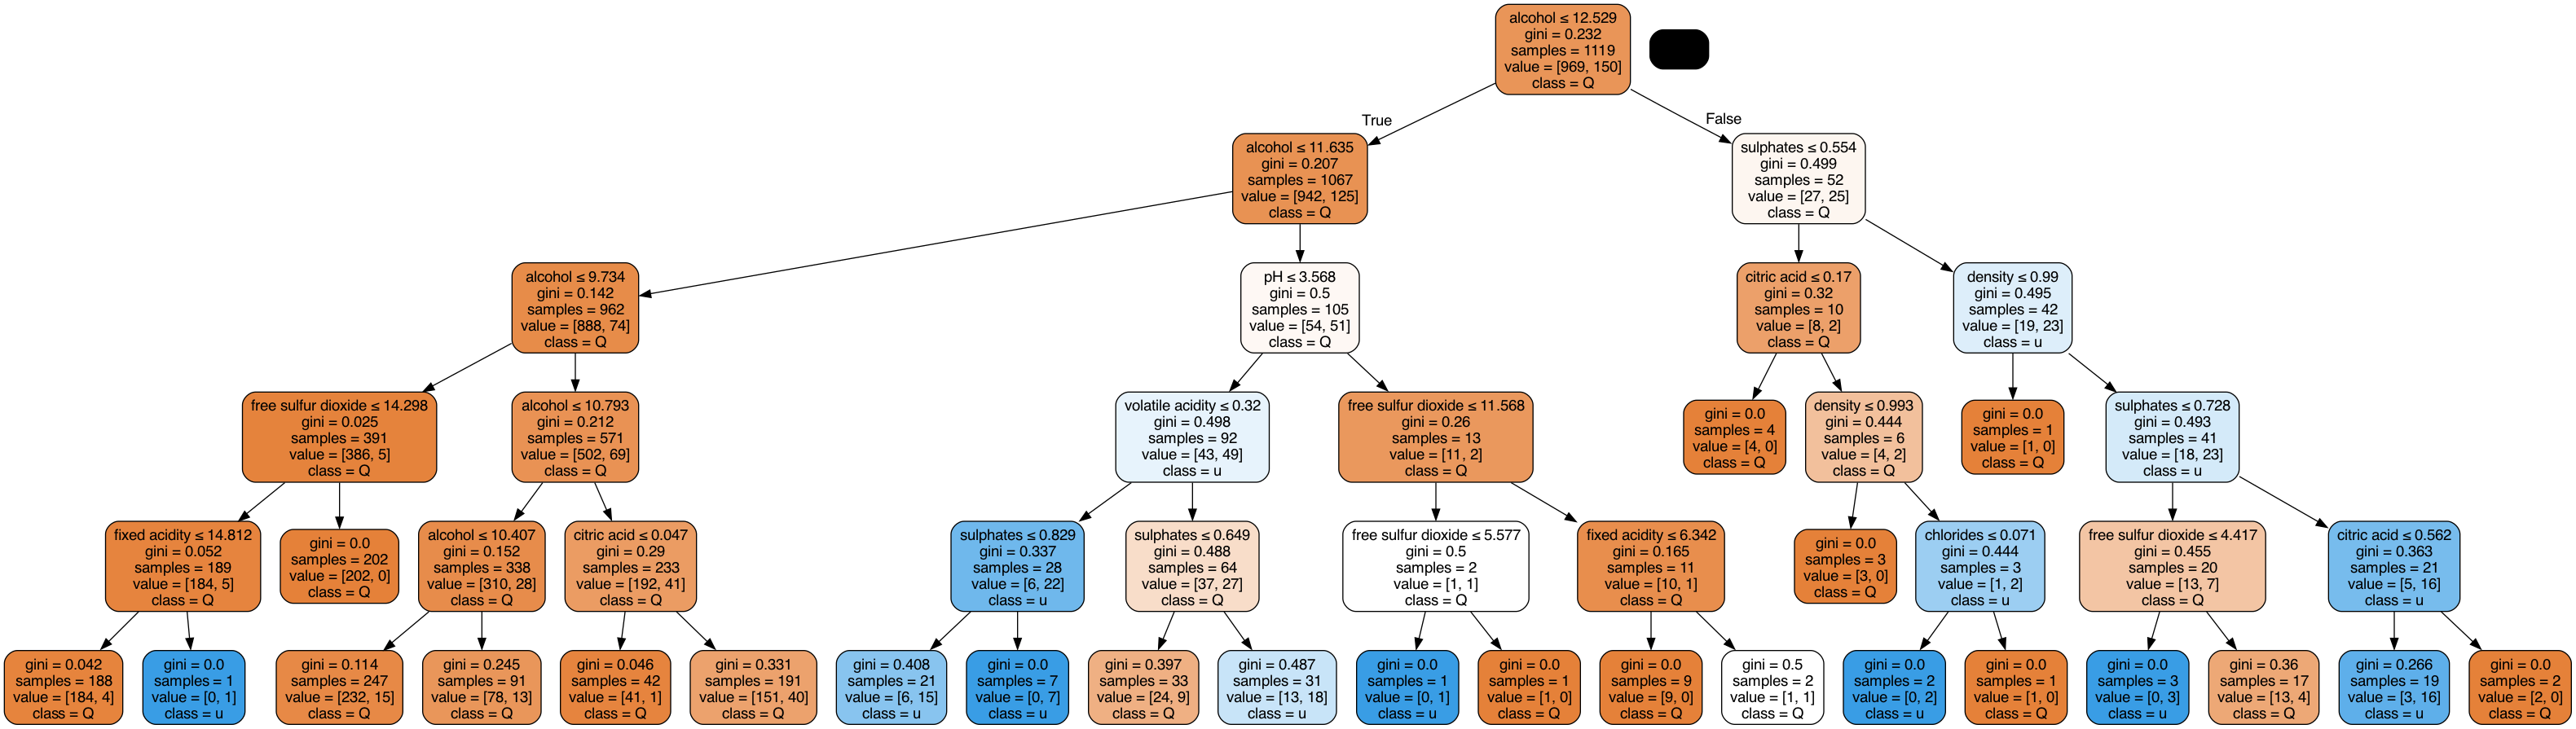

In [162]:
import os

import pydotplus

from sklearn.tree import export_graphviz

from IPython.display import Image


dot_data = export_graphviz(wine_tree, out_file=None,feature_names=x_data.columns,

                                class_names='Qual', filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [184]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report

import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./winequality-red.csv',delimiter=';',dtype=float)

# x_data = wine_data.iloc[:,0:-1]

# y_data = wine_data.iloc[:,-1]

LE = LabelEncoder()

for feature in df.columns:
    df[feature] = LE.fit_transform(df[feature])

features = df.columns 

print(feature)

quality


In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report

import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./winequality-red.csv',delimiter=';',dtype=float)

# x_data = wine_data.iloc[:,0:-1]
# y_data = wine_data.iloc[:,-1]

LE = LabelEncoder()

for feature in df.columns:
    df[feature] = LE.fit_transform(df[feature])

features = df.columns 

X = np.array(pd.DataFrame(df, columns=["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
                                       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]))
y = np.array(pd.DataFrame(df, columns=["quality"]))


# Score 값이 7보다 작으면 0,  7보다 크거나 같으면 1로 값 변경.

y_data = np.array(["low" if score < 3 else "average" if score < 7 else "high" for score in y])


# 트레인, 테스트 데이터 나누기.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3,random_state=42)

decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_features=3, min_samples_leaf=2)

wine_tree.fit(X_train, y_train)

y_pred = wine_tree.predict(X_test)

y_pred_train = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_pred, y_test))

print("Train Data:", accuracy_score(y_train, y_pred_train))
print("Test Data" , accuracy_score(y_test, y_pred_test))

[[  0   0   0   2   0   0]
 [  0   0   9   6   0   0]
 [  0   0 158  67   1   0]
 [  0   0  65  98  14   0]
 [  0   0   3  36  15   0]
 [  0   0   0   3   3   0]]
0.5645833333333333
Train Data: 0.5844504021447721
Test Data 0.5645833333333333


[[4 0 0]
 [0 0 0]
 [1 1 0]]
0.6666666666666666
Train Data: 0.8571428571428571
Test Data 0.6666666666666666


[Text(0.6, 0.8333333333333334, 'citric acid <= 9.5\nentropy = 1.292\nsamples = 14\nvalue = [1, 10, 2, 1]'),
 Text(0.4, 0.5, 'sulphates <= 2.5\nentropy = 0.817\nsamples = 12\nvalue = [1, 10, 0, 1]'),
 Text(0.2, 0.16666666666666666, 'entropy = 1.585\nsamples = 3\nvalue = [1, 1, 0, 1]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0]')]

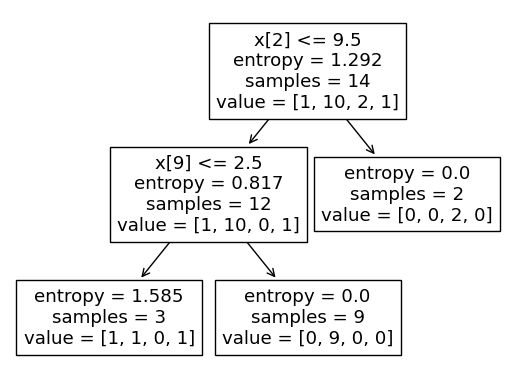

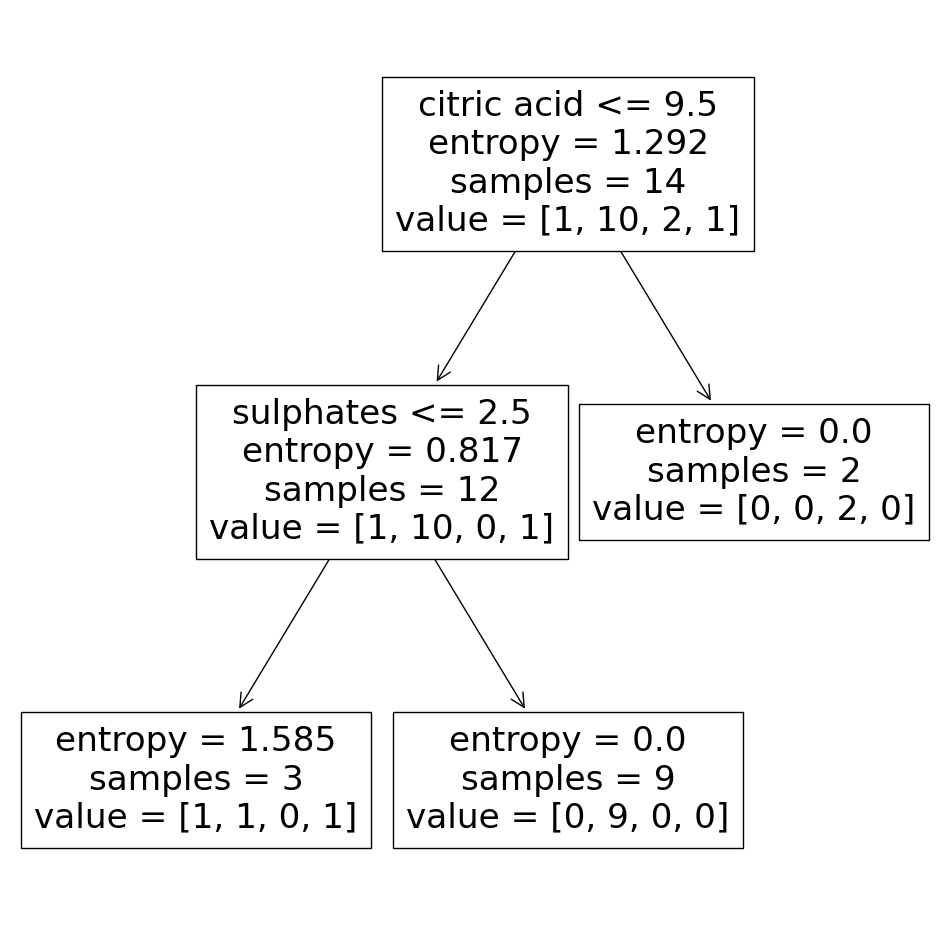

In [203]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./winequality-red.csv',delimiter=';',dtype=float)

df = df.head(20) #가독성이 좋지 않아 10개 데이터만 테스트
# x_data = wine_data.iloc[:,0:-1]
# y_data = wine_data.iloc[:,-1]

LE = LabelEncoder()

for feature in df.columns:
    df[feature] = LE.fit_transform(df[feature])

features = df.columns 

X = np.array(pd.DataFrame(df, columns=["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
                                       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]))
y = np.array(pd.DataFrame(df, columns=["quality"]))


# Score 값이 7보다 작으면 0,  7보다 크거나 같으면 1로 값 변경.

y_data = np.array(["low" if score < 3 else "average" if score < 7 else "high" for score in y])


# 트레인, 테스트 데이터 나누기.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3,random_state=42)

decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_features=3, min_samples_leaf=2)

decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

y_pred_train = decision_tree_model.predict(X_train)
y_pred_test = decision_tree_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_pred, y_test))

print("Train Data:", accuracy_score(y_train, y_pred_train))
print("Test Data" , accuracy_score(y_test, y_pred_test))

features = df.columns  # 열을 features 변수에 저장
plt.figure(figsize=(12, 12))  # 피겨사이즈 설정
tree.plot_tree(decision_tree_model, feature_names=features) #class_names=class_name

# print(classification_report(y_true, y_pred))

# dot_data = export_graphviz(wine_tree, out_file=None,feature_names=df.columns,

#                                 class_names='Qual', filled=True, rounded=True, special_characters=True)

# graph = pydotplus.graph_from_dot_data(dot_data)

# Image(graph.create_png())


Train Data: 0.8963360142984808
Test Data 0.8458333333333333
              precision    recall  f1-score   support

     average       0.90      0.92      0.91       413
        high       0.44      0.39      0.41        67

    accuracy                           0.85       480
   macro avg       0.67      0.65      0.66       480
weighted avg       0.84      0.85      0.84       480



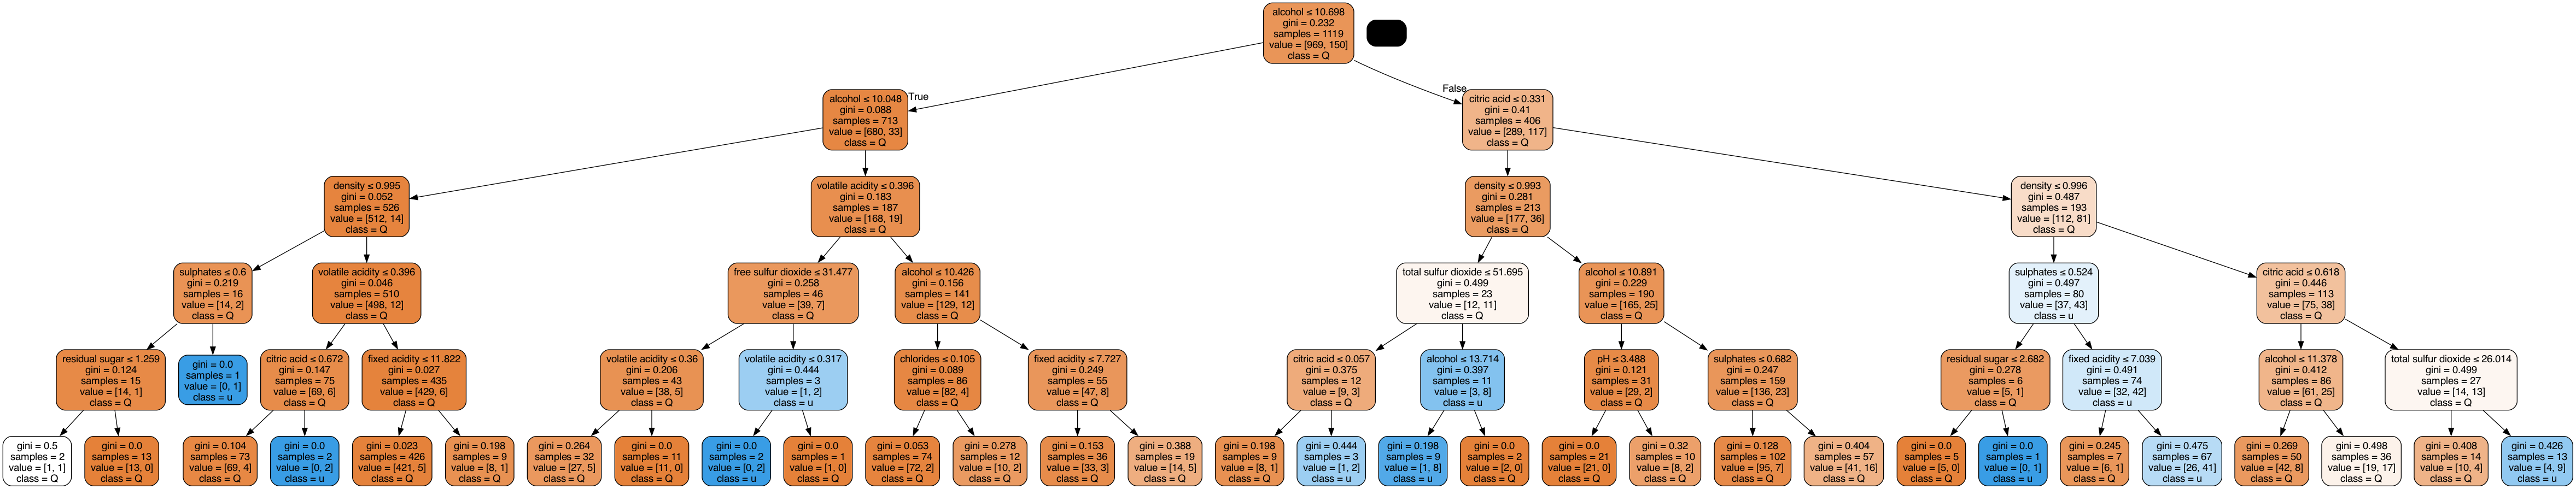

In [187]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report

import os
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

x_data = wine_data.iloc[:,0:-1]
y_data = wine_data.iloc[:,-1]


wine_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth=5,splitter='random')
wine_tree.fit(train_x, train_y)

y_data = np.array(["low" if score < 3 else "average" if score < 7 else "high" for score in y_data])
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size = 0.3,random_state=42)


y_pred_train = wine_tree.predict(train_x)
y_pred_test = wine_tree.predict(test_x)

print("Train Data:", accuracy_score(train_y, y_pred_train))
print("Test Data" , accuracy_score(test_y, y_pred_test))


y_true, y_pred = test_y, wine_tree.predict(test_x)
print(classification_report(y_true, y_pred))


dot_data = export_graphviz(wine_tree, out_file=None,feature_names=x_data.columns,

                                class_names='Qual', filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
